In [1]:
#Import necessary library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#Reading file(Dataset)
df=pd.read_csv("train.csv")

In [5]:
#Preview the first and last few rows
df.head()

,segment_id,install_year,last_maintenance,train_load_tons,traffic_density,geometry_deviation,vibration_level,weather,rainfall_mm,temperature,failure,failure_cause,maintenance_required
0,4174,2007.0,9/10/2023,0.10,0.24,0.11,0.16,Sunny,25.68,0.46,0,NaN,No
1,4507,2021.0,1/19/2020,0.18,0.22,0.11,0.34,Sunny,14.54,0.48,0,NaN,No
2,1860,1996.0,7/30/2024,0.15,0.28,0.08,0.44,Stormy,10.85,0.51,0,NaN,No
3,2294,1996.0,4/3/2023,0.14,0.46,0.20,0.55,Cloudy,13.76,0.32,0,NaN,Yes
4,2130,1984.0,10/7/2024,0.13,0.91,0.18,0.18,Sunny,44.84,0.39,0,NaN,Yes


In [7]:
df.tail()

,segment_id,install_year,last_maintenance,train_load_tons,traffic_density,geometry_deviation,vibration_level,weather,rainfall_mm,temperature,failure,failure_cause,maintenance_required
99995,2149,1989.0,10/15/2020,0.14,0.21,0.01,0.54,Stormy,18.06,NaN,0,NaN,Yes
99996,3559,2007.0,7/29/2024,0.13,0.89,0.07,0.30,Sunny,23.43,0.25,0,NaN,No
99997,3177,1996.0,8/12/2021,0.17,0.88,0.11,0.49,Cloudy,2.11,0.38,1,Wear and Tear,Yes
99998,3755,1970.0,6/18/2022,0.15,0.35,0.12,0.31,Foggy,41.61,0.38,0,NaN,No
99999,2067,1982.0,3/25/2022,0.16,0.57,0.08,0.28,Foggy,27.97,0.26,0,NaN,No


In [9]:
#Replace None values with No
df.replace(to_replace=['None', None], value='No', inplace=True)

In [11]:
#Shape of dataset(row,cloumn)
df.shape

(100000, 13)

In [13]:
df.describe()

,segment_id,install_year,train_load_tons,traffic_density,geometry_deviation,vibration_level,rainfall_mm,temperature,failure
count,100000.000000,98000.000000,97000.000000,98000.000000,98000.000000,98500.000000,98000.000000,98000.000000,100000.00000
mean,3000.088550,1995.963092,0.131929,0.498815,0.095567,0.368479,19.985114,0.376663,0.08097
std,1153.607993,15.265566,0.046233,0.292278,0.060971,0.145996,20.178327,0.096306,0.27279
min,1000.000000,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2001.000000,1983.000000,0.110000,0.250000,0.050000,0.270000,5.730000,0.310000,0.00000
50%,2997.000000,1996.000000,0.130000,0.490000,0.090000,0.370000,13.770000,0.370000,0.00000
75%,4000.000000,2009.000000,0.150000,0.750000,0.130000,0.470000,27.590000,0.440000,0.00000
max,4999.000000,2022.000000,1.000000,1.000000,1.000000,1.000000,229.150000,1.000000,1.00000


In [15]:
#Missing values
df.isnull().sum()

segment_id                 0
install_year            2000
last_maintenance           0
train_load_tons         3000
traffic_density         2000
geometry_deviation      2000
vibration_level         1500
weather                    0
rainfall_mm             2000
temperature             2000
failure                    0
failure_cause              0
maintenance_required       0
dtype: int64

In [17]:
#Drop rows with null values
df2 = df.dropna()

In [19]:
#If I drop null values, then the data is losing around 13% so I filled data(install year) with median and other with mean and mode
df2.count()

segment_id              86375
install_year            86375
last_maintenance        86375
train_load_tons         86375
traffic_density         86375
geometry_deviation      86375
vibration_level         86375
weather                 86375
rainfall_mm             86375
temperature             86375
failure                 86375
failure_cause           86375
maintenance_required    86375
dtype: int64

In [21]:
#Fill 'install_year' with median (suitable for year data)
df['install_year'].fillna(df['install_year'].median(), inplace=True)

#Fill categorical 'weather' with mode
df['weather'].fillna(df['weather'].mode()[0], inplace=True)

#Fill other numerical columns with mean
columns_to_fill_mean = [
    'train_load_tons', 'traffic_density', 'geometry_deviation',
    'rainfall_mm', 'temperature', 'vibration_level'
]
for col in columns_to_fill_mean:
    df[col].fillna(df[col].mean(), inplace=True)

C:\Users\kthor\AppData\Local\Temp\ipykernel_4580\4153723255.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['install_year'].fillna(df['install_year'].median(), inplace=True)
C:\Users\kthor\AppData\Local\Temp\ipykernel_4580\4153723255.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [23]:
#Cross checking Missing values after filling
print(df.isnull().sum())
print(df.shape)

segment_id              0
install_year            0
last_maintenance        0
train_load_tons         0
traffic_density         0
geometry_deviation      0
vibration_level         0
weather                 0
rainfall_mm             0
temperature             0
failure                 0
failure_cause           0
maintenance_required    0
dtype: int64
(100000, 13)


In [25]:
#Knowing data types
df.dtypes

segment_id                int64
install_year            float64
last_maintenance         object
train_load_tons         float64
traffic_density         float64
geometry_deviation      float64
vibration_level         float64
weather                  object
rainfall_mm             float64
temperature             float64
failure                   int64
failure_cause            object
maintenance_required     object
dtype: object

In [27]:
#Converting string to datetime
df['last_maintenance'] = pd.to_datetime(df['last_maintenance'], errors='coerce')

In [29]:
df.dtypes

segment_id                       int64
install_year                   float64
last_maintenance        datetime64[ns]
train_load_tons                float64
traffic_density                float64
geometry_deviation             float64
vibration_level                float64
weather                         object
rainfall_mm                    float64
temperature                    float64
failure                          int64
failure_cause                   object
maintenance_required            object
dtype: object

In [31]:
#Ckecking outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"{column}: {len(outliers)} outliers")
    return outliers

In [33]:
#Check in numerical columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

for col in numeric_cols:
    detect_outliers_iqr(df, col)

segment_id: 0 outliers
install_year: 0 outliers
train_load_tons: 2036 outliers
traffic_density: 0 outliers
geometry_deviation: 1077 outliers
vibration_level: 349 outliers
rainfall_mm: 5203 outliers
temperature: 1194 outliers
failure: 8097 outliers


In [35]:
df.tail()

,segment_id,install_year,last_maintenance,train_load_tons,traffic_density,geometry_deviation,vibration_level,weather,rainfall_mm,temperature,failure,failure_cause,maintenance_required
99995,2149,1989.0,2020-10-15,0.14,0.21,0.01,0.54,Stormy,18.06,0.376663,0,No,Yes
99996,3559,2007.0,2024-07-29,0.13,0.89,0.07,0.30,Sunny,23.43,0.250000,0,No,No
99997,3177,1996.0,2021-08-12,0.17,0.88,0.11,0.49,Cloudy,2.11,0.380000,1,Wear and Tear,Yes
99998,3755,1970.0,2022-06-18,0.15,0.35,0.12,0.31,Foggy,41.61,0.380000,0,No,No
99999,2067,1982.0,2022-03-25,0.16,0.57,0.08,0.28,Foggy,27.97,0.260000,0,No,No


In [37]:
#Fill outliers using IQR
def fill_outliers_iqr(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values above upper bound
    df[column] = np.where(df[column] > upper_bound, upper_bound,
                  np.where(df[column] < lower_bound, lower_bound, df[column]))
#Getting numeric columns
numeric_cols = df.select_dtypes(include='number').columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'failure']  # Exclude 'failure'
#Outlier filling
for col in numeric_cols:
    fill_outliers_iqr(col)

print("Outliers filled") #Confirmation

Outliers filled


In [39]:
#Cross checking outlier after filling
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in numeric_cols:
    detect_outliers_iqr(df, col)

segment_id: 0 outliers
install_year: 0 outliers
train_load_tons: 0 outliers
traffic_density: 0 outliers
geometry_deviation: 0 outliers
vibration_level: 0 outliers
rainfall_mm: 0 outliers
temperature: 0 outliers
failure: 8097 outliers


In [41]:
df.tail()

,segment_id,install_year,last_maintenance,train_load_tons,traffic_density,geometry_deviation,vibration_level,weather,rainfall_mm,temperature,failure,failure_cause,maintenance_required
99995,2149.0,1989.0,2020-10-15,0.14,0.21,0.01,0.54,Stormy,18.06,0.376663,0,No,Yes
99996,3559.0,2007.0,2024-07-29,0.13,0.89,0.07,0.30,Sunny,23.43,0.250000,0,No,No
99997,3177.0,1996.0,2021-08-12,0.17,0.88,0.11,0.49,Cloudy,2.11,0.380000,1,Wear and Tear,Yes
99998,3755.0,1970.0,2022-06-18,0.15,0.35,0.12,0.31,Foggy,41.61,0.380000,0,No,No
99999,2067.0,1982.0,2022-03-25,0.16,0.57,0.08,0.28,Foggy,27.97,0.260000,0,No,No


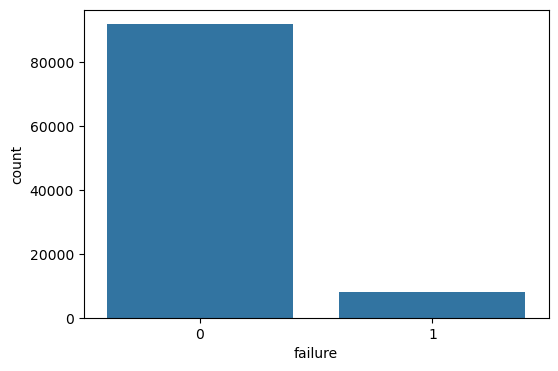

In [43]:
#Failure Distribution
fig, axes = plt.subplots(1, 1, figsize=(6, 4))  #1 row, 1 column
sns.countplot(x='failure', data=df, ax=axes)
plt.show()

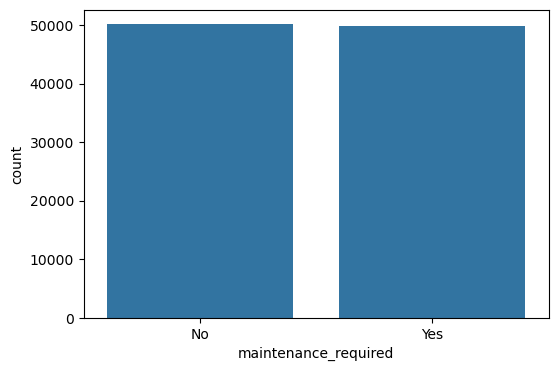

In [45]:
#Maintenance Required
fig, axes = plt.subplots(1, 1, figsize=(6, 4))
sns.countplot(x='maintenance_required', data=df, ax=axes)
plt.show()

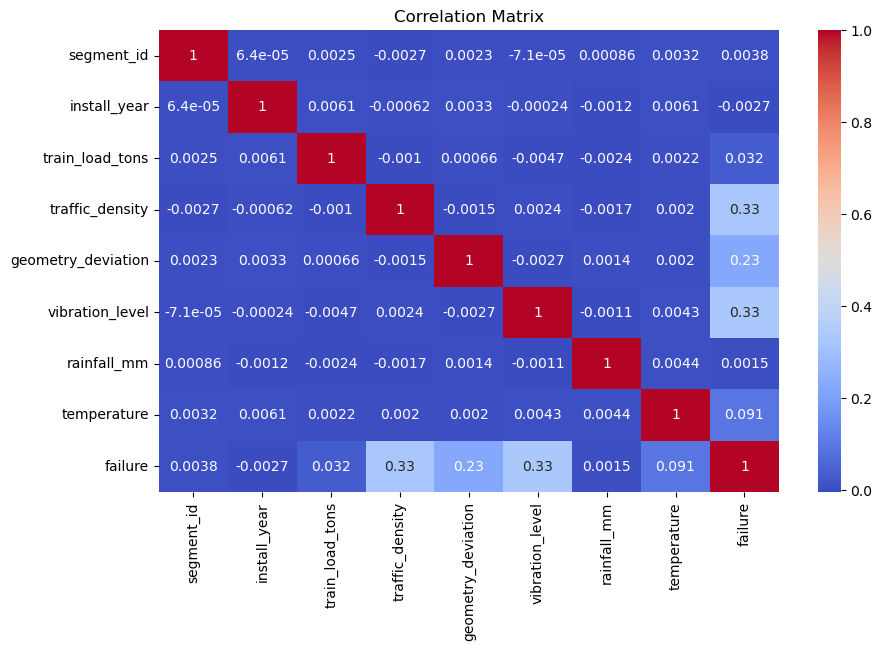

In [47]:
#Correlation matrix
numeric_cols = df.select_dtypes(include=np.number)
corr = numeric_cols.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [49]:
#percentage of failure and non failure
print(df['failure'].value_counts(normalize=True))

failure
0    0.91903
1    0.08097
Name: proportion, dtype: float64


In [51]:
#Ensuring data is cleaned 

# 1)missing value
# 2)outlier
# 3)data type
# 4)duplicates

In [59]:
df=df.round(2)

In [61]:
#Clean data to CSV for model building
df.to_csv("train_data_clean.csv", index=False)
print("Cleaned data export")

Cleaned data export
